In [1]:
import pathlib
import pandas as pd
import scanpy as sc
import seaborn as sns
import scirpy as ir

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter, MultipleLocator

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figure4"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg", ".eps"]
filetype = "pdf"
sc.settings.figdir = output_dir
sc.set_figure_params(format="svg", transparent=True)
sc.set_figure_params(dpi_save=600, figsize=(3.5, 3.5))


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", 20)
pd.set_option("display.width", 100)

plt.style.use("../../scripts/paper.mplstyle")
%run ../../scripts/plotting_helper.py

In [2]:
stat_file = '../../code/outputs/seqclone_with_effect_size_bcells/clone_id_var_df.csv'

seqclone_df = pd.read_csv(stat_file, index_col=0)


pc_genes = pd.read_csv('../../code/outputs/seqclone_BM2_std_allcells/clone_id_tests.csv', index_col=0)


pc_genes['freq_pvalue'] = pc_genes.freq_pvalue / 10**4
pc_genes = correct_p(pc_genes, 'freq_pvalue', 'bonferroni')
pc_genes = correct_p(pc_genes, 'pvalue', 'fdr_bh')

clonal_in_vivo = pc_genes[pc_genes.significant == True]

print(clonal_in_vivo[~clonal_in_vivo.index.str.contains('IGH|IGK|IGL')].shape[0], "of the clonal in vivo genes were Ig Variable")
print(clonal_in_vivo[clonal_in_vivo.index.str.contains('IGH|IGK|IGL')].shape[0], "of the clonal in vivo genes weren't Ig Variable")


genes_file = stat_file
h5ad = '../../processed_data/h5ad_objects/bcells.h5ad'

# Load Stats Data
stats = pd.read_csv(genes_file, index_col=0)
adata = sc.read_h5ad(h5ad)


270 of the clonal in vivo genes were Ig Variable
125 of the clonal in vivo genes weren't Ig Variable


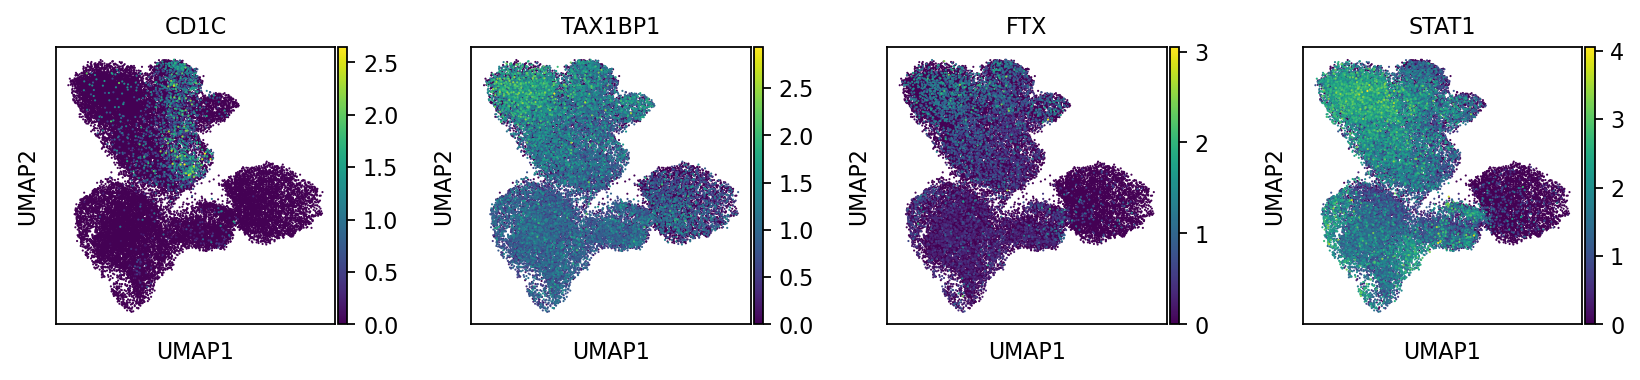

In [4]:
sc.pl.umap(adata, color = ["CD1C", "TAX1BP1", "FTX", "STAT1"])

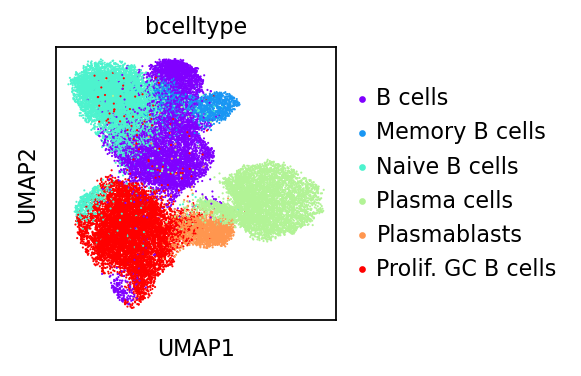

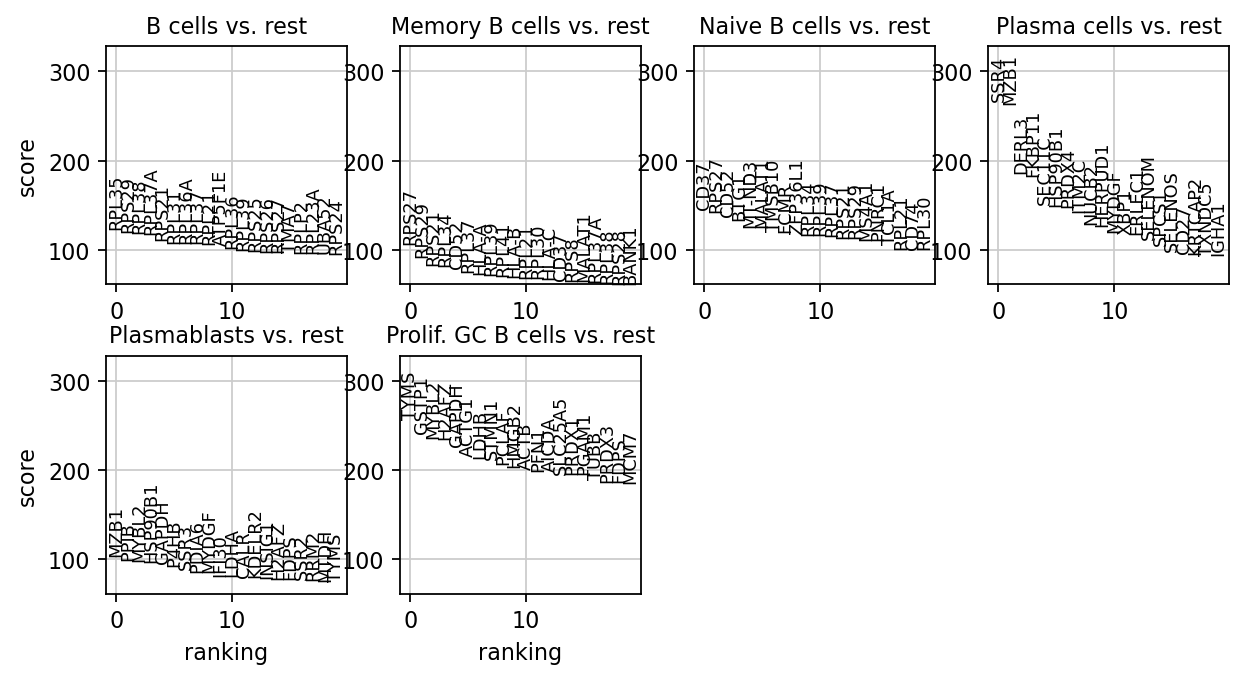

In [5]:
subset = False
if subset:
    adata = adata[adata.obs.bcelltype.str.contains("iv ")]
sc.tl.rank_genes_groups(adata, groupby='bcelltype')
sc.pl.umap(adata, color = 'bcelltype')

sc.pl.rank_genes_groups(adata)

# get cell fate determining genes (differentially expressed)
num_de_genes = 50
de_genes = []
for bcelltype in adata.obs.bcelltype.unique():
    dedf = sc.get.rank_genes_groups_df(adata, group=bcelltype)
    de_genes.append(dedf.loc[:num_de_genes,'names'])
de = pd.concat(de_genes)

de = de.drop_duplicates()


In [6]:
# Remove Ig genes
de = de[~de.str.contains("IGL|IGH|IGK")]

In [7]:
# filter out trivial clonal genes
clonal_genes = seqclone_df[~seqclone_df.index.str.contains("IGK|IGH|IGL")]
# filter to be expressed genes amongst many cells
bcell_transcriptome = clonal_genes[clonal_genes.pct_dropout_by_counts < 80]

In [8]:
# bootstrap
nboots = 10000
overlap = []
comparison_set = de
for n in range(nboots):
    # sample genes from the B cell transcriptome
    sampled = bcell_transcriptome.sample(n=comparison_set.shape[0])
    
    union_size = (len(set(sampled.index) & set(comparison_set)))
    #normalize and append
    overlap.append(union_size / comparison_set.shape[0])

# same number of top clonal genes
observed = bcell_transcriptome.iloc[:comparison_set.shape[0],:].index
# calculate the set overlap
observed = (len(set(observed) & set(comparison_set)) / comparison_set.shape[0])

observed / np.mean(overlap)

13.871686896210056

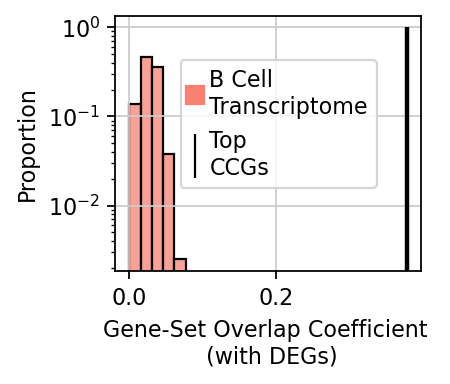

In [9]:
fig, ax = plt.subplots(1,1, figsize = (width*0.7, height*0.6))
ax = sns.histplot(overlap, stat='proportion', bins = 5, kde = False, color='salmon')
plt.vlines(x = observed, ymin=0, ymax = 1, colors = 'k', linestyles='-', linewidth = 2)
#plt.scatter(x = observed, y = 0.001, s=150, c='k', marker = '*', alpha=1, edgecolors='grey')
plt.xlabel("Gene-Set Overlap Coefficient \n (with DEGs)")
plt.ylabel("Proportion")
plt.yscale('log')
#plt.tight_layout()
legend_elements = [Line2D([0], [0], marker='s', color='salmon', label='B Cell\nTranscriptome',
                    linewidth = 2, markersize=4,), 
               Line2D([0], [0], linewidth = 0, marker='|', markersize=10, color='k',label='Top\nCCGs')]
ax.legend(handles=legend_elements, loc='best', borderaxespad=2)

In [10]:
save_figure(fig, "Gene-Set_Overlap_DE")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [11]:
lit_genes = ["CD19",
"CD79A",
"CCR2",
"PAX5",
"RAG1","RAG2",
"CHCHD10",
"CD79A",
"CD79B",
"CD19",
"MS4A1",
"MKI67",
"STMN1",
"DNTT",
"VPREB1",
"PAX5",
"RAG1",
"RAG2", 
"CD22",
"CD74",
"IGHM",
"IGKC",
"IGLC3",
"H2A",
"CD93",
"CD74", 
"IFI30",
"TMSB4X",
"PFN1", 
"CD37",
"H3F3B", 
"EIF1",
"CD24", 
"NFKB",
"TIFA",
"NFBKIA",
"CXCR4",
"CCL2", 
"CXCL1"
"CXCL2", 
"CCL4", 
"ITGB2"
"IGHA1",
"IGHG1",
"IGHG2",
"SDC1", 
"PRDM1",
"JCHAIN"
"IGHD", "CD19","CD22", "CD52"
"MS4A1",
"LTB",
"CD37",
"CD79B",
"CD52",
"HLA-DQB1",
"TNFRSF13C",
"TCL1A", 
"LINC00926",
"STAG3",
"IGHD",
"BANK1",
"IRF8",
"BIRC3",
"P2RX5",
"VPREB3",
"CD22", 
"CD74",
"SELL",
"CD27", 
"CD38",
"GLC2",
"IGHG1",
"IGKC",
"IGHG2",
"IGHG3",
"IGHGP",
"IGLC3",
"JCHAIN",
"IGHA1",
"IGHG4",
"IGHA2",
"IGHM",
"IGLV3-1",
"IGLC7",
"MZB1",
"CD79A",
"SSR4",
"IL16"
"IGKC",
"MS4A1",
"CD79A"
"PRDX2",
"HBD"
"BCL6",
"AICDA",
"STMN1",
"BIRC5", "TOP2A", "AURKB", "CXCR4", "TACC3", "CKS1B", "CDK1", "MKI67", 
         "UBE2C", "CCNA2", "KIAA0101", "CDCA3", "KIF22", "HMGB3", "CDKN3",
         "NUSAP1", "AICDA", "MYBL2", "LMNB1"
"GPX1", "CD27", "LY86", "HMCES", "JCHAIN", "HSPA4", "DNAJC10", "FCRLA", "INPP5D", 
         "QRSL1", "REEP5", "LILRB1", "CD24", "WDR83OS", "ALOX5", "ARHGEF2", "SERINC2", 
         "RPS19BP1", "PYCARD", "BCL2A1", "CD83", "IL4I1", "LMO3", "EBI3", "HLA-DQB2", "TRAF4",
         "PLEK", "IER2", "NFKBIA", "FCER2", "BCAR3", "DUSP1","SNX11", "PLPP5", "PHACTR1", "TAP1",
         
         "RAB3GAP2", "DHRS9", "FCRL5"
"BCL2A", "CD83", "IL4I1", "LMO2", "EBI3", "HLA-DQB2", "TRAF4", "PLEK", "IER2", "NFKBIA", "FCRE2", "BCAR3",
         "DUSP2", "SNX11", "PLPP5", "PHACTR1", "TAP1", "RAB3GAP2", "DHRS9", "FCRL5"
"NOTCH2", "JAM3"
"PRDM1", "SDC1"
"PCNA", "MKI67", "CDK1", "CDC20", "FOXP1", "AICDA", "MYC", "EZH2", "E2F1", "FOXO1", "BCL6",
"PCNA", "MKI67", "CDK1", "CDC20", "CD72", "PTPN6", "IFNGR1", "CAMK1", "CD22", "CD83", "BCL2A1"

"MYC", "SLA", "FCRL2", "CFLAR", "FOXP1", "CCR6", "CD44", "CD69", "CXCR4"

"BANK1", "RASGPR2", "CELF2", "IFITM1", "ITFM2", "INFGR1", "GPR183", "TNFRSF13B", "SELL", "MYC", "FXYD5", "STAT1", "PAX5","MEF2B", "SIPR2", "PRDM1", "CD9",
"IRF4", "XPB1", "MZB1", "TNFRSF17", "FKBP11", "CAMK1", "MEF2B", "RGS13", "MS4A1", "PAX5","IRF4", "PRDM1", "XBP1", "FKBP11",
"CD52", "CD83", "HSPD1", "RAN", "MIF", "ATP5B", "MYC", "DKC1", "LRRC58", "H2A", "GADD45A", "AICDA", "PAX5", "SON", "BRD4", "TCF3", "CECR2", "FAM193a", "BCL6", "CXCR4GZ", "RPS15", "RPS26", "RPS20", "SNHG8", "BRCA1", "MCM5", "LIG1", "DHFR", "CDC6",
"BCL6", "FAS", "CD38", "CCR6", "BCL2", "MKI67", "HIST1H1B", "CENPF", "CENPE", "INCENP", "HIS1H2AP", "TOP2A", "HIST1H1E", "HHEX", "TIE3", "KIF2", "ZEB2", "BH1H4E1PML", "MNDA1"]

In [12]:
# cross reference with all genes in dataset
lit_genes = pd.Series(list(set(adata.var.index) & set(lit_genes)))

In [13]:
# bootstrap
nboots = 10000
overlap = []
comparison_set = lit_genes
comparison_set = pd.Series(comparison_set)
for n in range(nboots):
    # sample genes from the B cell transcriptome
    sampled = bcell_transcriptome.sample(n=comparison_set.shape[0])
    
    union_size = (len(set(sampled.index) & set(comparison_set)))
    #normalize and append
    overlap.append(union_size / comparison_set.shape[0])

# same number of top clonal genes
observed = bcell_transcriptome.iloc[:comparison_set.shape[0],:].index
# calculate the set overlap
observed = (len(set(observed) & set(comparison_set)) / comparison_set.shape[0])

observed / np.mean(overlap)

8.542749341496405

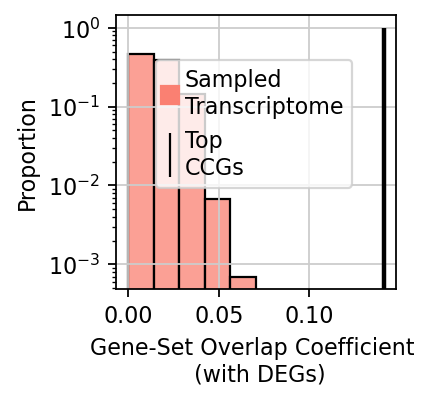

In [14]:
ax = sns.histplot(overlap, stat='proportion', bins = 5, kde = False, color='salmon')
plt.vlines(x = observed, ymin=0, ymax = 1, colors = 'k', linestyles='-', linewidth = 2)
#plt.scatter(x = observed, y = 0.001, s=150, c='k', marker = '*', alpha=1, edgecolors='grey')
plt.xlabel("Gene-Set Overlap Coefficient \n (with DEGs)")
plt.ylabel("Proportion")
plt.yscale('log')
#plt.tight_layout()
legend_elements = [Line2D([0], [0], marker='s', color='salmon', label='Sampled\nTranscriptome',
                    linewidth = 2, markersize=4,), 
               Line2D([0], [0], linewidth = 0, marker='|', markersize=10, color='k',label='Top\nCCGs')]
ax.legend(handles=legend_elements, loc='best', borderaxespad=2)